# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Support Vector Machines

_Author:_ Timothy Book, General Assembly DC

## Agenda

* **Motivation**: What motivates the need for an SVM?
* **Historical Success**: The rise and fall and rise again(?) of SVMs in modern data science.
* **Under the hood**: How are SVMs fit?
* **Example 1**: Fit a linear SVM classifier.
* **Kernels**: What are kernels? What is the "kernel trick"?
* **Example 2**: Fit a kernelized SVM classifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Motivation: Why?
Consider classifying the graph below into two groups. Don't you really really just want to draw a line through it and call that your classifier? That's what SVMs do. Models that do this are called **discriminant models**.

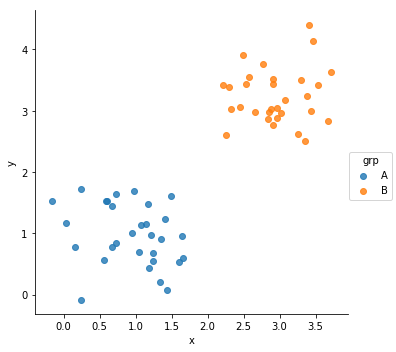

In [2]:
df = pd.read_csv('data/linsep.csv')
sns.lmplot(x='x', y='y', hue='grp', data=df, fit_reg=False);

## Historical Success
SVMs used to be the **bee's knees**. They were first theorized by Vapnik in the 60s, but computational limitations held them back from being used. Vapnik and another researched revived them in the mid-90s and enjoyed a huge boom in use. For a period of time, a 9th-degree polynomial was the high score in the MNIST hand-written digit recognition competition!

![](https://cdn-images-1.medium.com/max/584/1*9Mjoc_J0JR294YwHGXwCeg.jpeg)

That is... until **neural nets happened**. Really, until about 5 years ago SVMs were one of the most popular models for classification. Now that's all dried up in favor of neural nets. SVMs are still excellent professional-grade models, of curse. Maybe their day will come again soon.

## Under the Hood
SVMs seek to draw a **separating hyperplane** (sometimes called a **discriminant**) through the data.

![](imgs/linsep-svm.jpeg)

Those yellow dots are the so-called **support vectors** - since they're all you need to describe the model.

The hyperplane (in this picture, a 2D line) is written similar to a linear model, **but SVMs are not linear models!**

$$ f(x) = \beta_0 + \beta_1x $$

Classification is made by being either above or below the hyperplane. That is, with this formula:

$$ G(x) = \text{sign}\lbrace\beta_0 + \beta_1x\rbrace $$

Notice that this implies our outputs are coded as $\pm 1$ and not $0/1$ like usual!

SVMs also support **multiclass classification**, but we won't go over the details here. There is also **support vector regression**, but we won't discuss that either, since it's not as popular.

## Part 1: Example: (Linear) SVM

In [3]:
from sklearn.svm import LinearSVC
X = df[['x', 'y']]
y = 2 * (df['grp'] == 'A') - 1

model = LinearSVC(C=1e10)
model.fit(X, y)
model.score(X, y)

1.0

In [7]:
print(model.intercept_)
print(model.coef_)
# uninterpretable, theyre are slope and intercept of hyperplane not the model 

[4.31458292]
[[-0.30193232 -1.77642094]]


In [8]:
b0_model = -model.intercept_ / model.coef_[0][1]
b1_model = -model.coef_[0][0] / model.coef_[0][1]
x_lin = np.linspace(start=0, stop=4, num=1000)
y_lin = b0_model + b1_model * x_lin
df_lin = pd.DataFrame({'x':x_lin, 'y':y_lin})

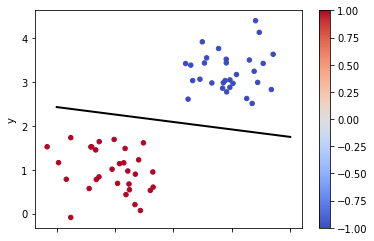

In [9]:
df.plot(kind='scatter', x='x', y='y', c=y, cmap='coolwarm')
plt.plot(df_lin['x'], df_lin['y'], 'k-', linewidth=2)

## Part II: Non-Separability
But we never have **separable** data in real life. So what do we do? In a **soft-margin SVM**, we try to minimize the sum of the misclassification margins (denoted as arrows in the picture below):

![](imgs/softmarg.png)

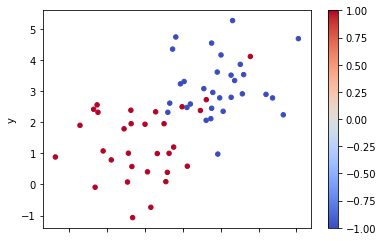

In [23]:
df = pd.read_csv('data/nonlinsep.csv')
df.plot(kind='scatter', x='x', y='y', c=y, cmap='coolwarm')

In [28]:
X = df[['x', 'y']]
y = 2 * (df['grp'] == 'A') - 1

model = LinearSVC(C=1e10, random_state=1)
model.fit(X, y)
model.score(X, y)

0.9

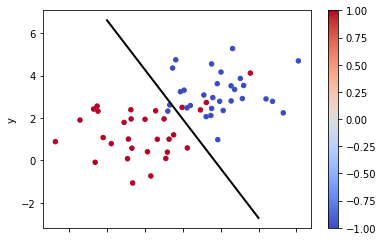

In [29]:
b0_model = -model.intercept_ / model.coef_[0][1]
b1_model = -model.coef_[0][0] / model.coef_[0][1]
x_lin = np.linspace(start=0, stop=4, num=1000)
y_lin = b0_model + b1_model * x_lin
df_lin = pd.DataFrame({'x':x_lin, 'y':y_lin})

df.plot(kind='scatter', x='x', y='y', c=y, cmap='coolwarm')
plt.plot(df_lin['x'], df_lin['y'], 'k-', linewidth=2);

## Part III: Kernelization
Ok, but what if we don't think any **linear discriminant** will work? (For example, if we have either of the data below:)

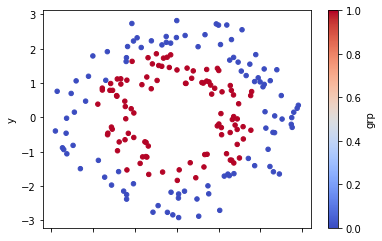

In [30]:
df1 = pd.read_csv('data/kernel.csv')
df1.plot(kind='scatter', x='x', y='y', c='grp', cmap='coolwarm');

(-4, 8)

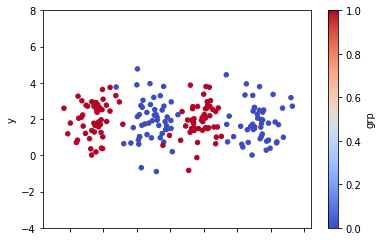

In [31]:
df2 = pd.read_csv('data/poly.csv')
df2.plot(kind='scatter', x='x', y='y', c='grp', cmap='coolwarm');
plt.xlim(-2, 18)
plt.ylim(-4, 8)

### Solution: Kernelize!
You might think the best solution here is to do some **feature engineering**: as in, use polynomial versions of our features. This will help in these toy examples, but the more generalizable example is to **kernelize** your features.

**Kernelizing** is the act of using a special function called a **kernel** to increase the dimensionality of your data in a special way. You can think of it as artifically adding **nonlinearity**.

![](imgs/kernelsep-svm.png)

A **kernel** is a special type of function which takes in two vectors and returns a transformed scalar. The two most popular are:

#### The $d$-th degree polynomial:
$$ K(\mathbf{x}, \mathbf{y}) = (1 + \mathbf{x}^T\mathbf{y})^d $$

#### The Radial basis function (aka Gaussian kernel):
$$ K(\mathbf{x}, \mathbf{y}) = \exp\{-\gamma\|\mathbf{x} - \mathbf{y}\|^2\} $$

### Under the Hood: The "Kernel Trick"
The "kernel trick" is simple: any time you see $x_i x_j$, replace with $K(x_i, x_j)$!

$$ x_i x_j \longrightarrow K(x_i, x_j) $$

SVMs are the most prominent case where the kernel trick is applied, but there are lots of techniques that benefit from it:

* SVMs
* Principal components analysis
* Linear models ($\rightarrow$ Smoothers)

In [32]:
from sklearn.svm import SVC

In [33]:
m1 = SVC(C=1e10, kernel='rbf')
X1 = df1[['x', 'y']]
y1 = df1['grp']
m1.fit(X1, y1)
m1.score(X1, y1)

1.0

In [34]:
m2 = SVC(C=1e10, kernel='rbf')
X2 = df2[['x', 'y']]
y2 = df2['grp']
m2.fit(X2, y2)
m2.score(X2, y2)

1.0